In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

import base_style
sns.set_style("white", base_style.base_style)
sns.set_context("talk", font_scale=1.5)

%matplotlib inline

import globus_auth

In [69]:
def get_vectors(data):
     for key in data:
        return (data[key]['content'].get('composition#comp', None), 
                data[key]['content'].get('http://www.oqmd.org#delta_e', None),
                data[key]['content'].get('http://www.oqmd.org#energy_pa', None),
                data[key]['content'].get('http://www.oqmd.org#volume_pa', None),
                data[key]['content'].get('http://www.oqmd.org#magmom_pa', None),
                data[key]['content'].get('http://www.oqmd.org#stability', None)) 

# Authenticate Search Client
Uses a valid authentication token if it exists

In [78]:
client = globus_auth.login("https://datasearch.api.demo.globus.org/")

# Search for Data and Aggregate into a DataFrame

In [81]:
n_records = 1000
offset = 0
vectors = []

for i in range(0,1):
    params = {
        'q': "OQMD",
        #'highlight': args.highlight,
        #'resource_type': args.resource_type,
        'count': n_records,
        'from': i*n_records,
        #'stats': args.stats,
        #'facets': args.facets,
        #'filters': args.filters,
        #'boost': args.boost
    }
    
    r = client.search(**params)
    result_iterator = r.data['gmeta']
    for result in result_iterator:
        vectors.append(get_vectors(result))

df = pd.DataFrame(vectors, columns=["composition", "delta_e", "energy_pa", "volume_pa", "magmom_pa","stability"])

# Example Output

In [82]:
print(json.dumps(r.data['gmeta'][10], sort_keys=True, indent=4))

{
    "http://oqmd.org/materials/composition/O3Tb1Tm1": {
        "content": {
            "composition#comp": "O3Tb1Tm1",
            "http://dublincore.org/documents/dcmi-terms#title": "OQMD - O3Tb1Tm1",
            "http://www.oqmd.org#bandgap": 1.89,
            "http://www.oqmd.org#delta_e": -2.96290725246059,
            "http://www.oqmd.org#energy_pa": -7.629440714,
            "http://www.oqmd.org#id": "4287762",
            "http://www.oqmd.org#magmom_pa": -0.00021562,
            "http://www.oqmd.org#stability": 0.783148914374995,
            "http://www.oqmd.org#volume_pa": 14.7305
        },
        "mimetype": "application/json"
    }
}


# Visualize the Results 

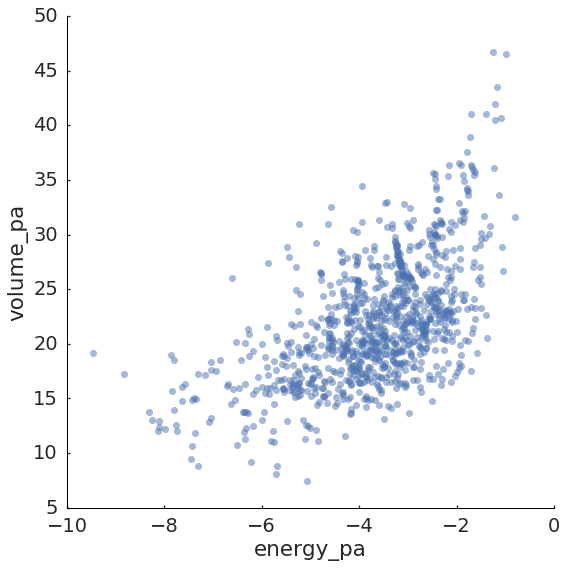

In [83]:
pal = sns.color_palette("muted")

x_col = "energy_pa"
y_col = "volume_pa"

# Make plot
g = sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=False,
               palette=pal, size=8, scatter_kws={"s": 50, "alpha": 0.5})

# Set axis labels
g.set_axis_labels(x_col,y_col)

In [99]:
n_records = 2

vectors = []

for i in range(1):
    params = {
        'q': "JANAF",
        #'highlight': args.highlight,
        #'resource_type': args.resource_type,
        'count': n_records,
        'from': n_records*i,
        #'stats': args.stats,
        #'facets': args.facets,
        #'filters': args.filters,
        #'boost': args.boost
    }
    
    r = client.search(**params)
    for result in r.data['gmeta']:
        vectors.append(get_vectors(result))




In [100]:
r.data

{'gmeta': [{'http://kinetics.nist.gov/janaf/1234': {'content': {'_#testing': 'janaftest1',
     'http://dublincore.org/documents/dcmi-terms#title': 'JANAF - 1234',
     'http://kinetics.nist.gov/janaf#comp': '1234'},
    'mimetype': 'application/json'}},
  {'http://kinetics.nist.gov/janaf/Na_ref': {'content': {'composition#comp': 'Na',
     'http://dublincore.org/documents/dcmi-terms#title': 'JANAF - Na - ref',
     'http://kinetics.nist.gov/janaf#Cp': [0.0,
      22.451,
      25.987,
      27.008,
      28.154,
      28.204,
      31.51,
      30.552,
      29.807,
      29.271,
      28.945,
      28.836,
      28.945,
      29.259,
      20.786,
      20.786,
      20.786,
      20.787,
      20.787,
      20.789,
      20.792,
      20.797,
      20.805,
      20.816,
      20.833,
      20.856,
      20.886,
      20.924,
      20.973,
      21.032,
      21.104,
      21.189,
      21.289,
      21.403,
      21.535,
      21.68,
      21.845,
      22.03,
      22.234,
      22

In [121]:
params = {
        'q': "OQMD",
        #'highlight': args.highlight,
        #'resource_type': args.resource_type,
        'count': 1,
        'from': 9000,
        'stats': True,
        #'facets': args.facets,
        #'filters': args.filters,
        #'boost': args.boost
    }
r = client.search(**params)



In [122]:
r

GlobusHTTPResponse({'gstats': {'total': 264246, 'count': 1, 'from': 9000}, 'gmeta': [{'http://oqmd.org/materials/composition/Gd1Mo1V2': {'content': {'http://www.oqmd.org#bandgap': 0.0, 'http://www.oqmd.org#energy_pa': -7.8972860275, 'http://www.oqmd.org#volume_pa': 17.4684, 'http://www.oqmd.org#stability': 0.509387875625, 'http://www.oqmd.org#delta_e': 0.448992250625, 'http://www.oqmd.org#id': '4283115', 'composition#comp': 'Gd1Mo1V2', 'http://www.oqmd.org#magmom_pa': 0.7831163, 'http://dublincore.org/documents/dcmi-terms#title': 'OQMD - Gd1Mo1V2'}, 'mimetype': 'application/json'}}]})